In [6]:
# We use the following line to allow us to embed plots in Jupyter notebooks
%matplotlib notebook

#imports
import numpy as np
import matplotlib.pyplot as plt
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.cm as cmx
import matplotlib.colors as colors

<IPython.core.display.Javascript object>


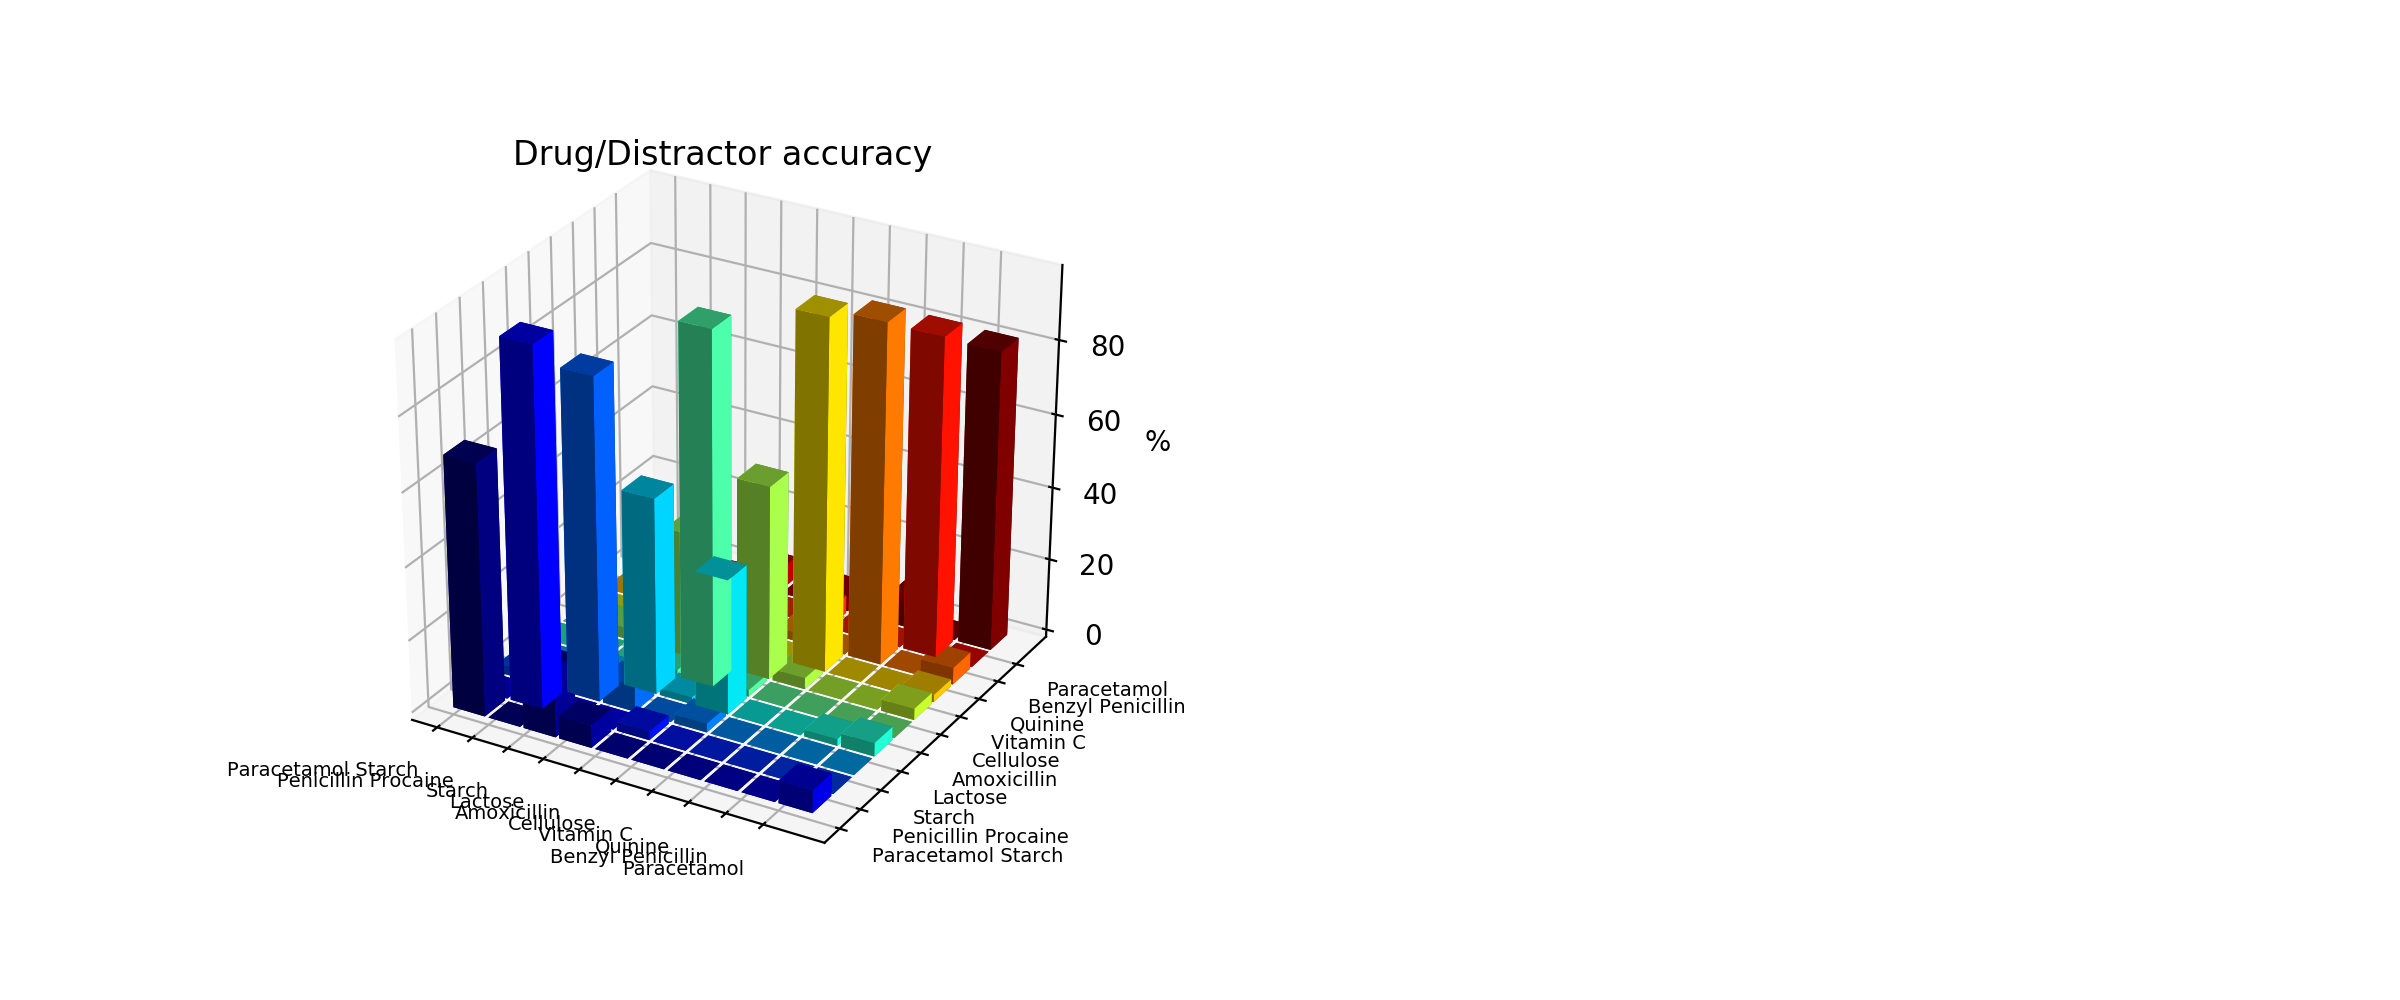

In [8]:
#input data
drug_size = 10

#drugs
drugs = ['Paracetamol Starch', 'Penicillin Procaine', 'Starch', 'Lactose', 'Amoxicillin', 'Cellulose', 'Vitamin C', 'Quinine', 'Benzyl Penicillin', 'Paracetamol' ]

#grab output from training
m=np.array([[11.0, 0.0, 3.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],\
            [0.0, 42.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],\
            [1.0, 0.0, 36.0, 3.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],\
            [0.0, 0.0, 1.0, 29.0, 1.0, 20.0, 0.0, 0.0, 1.0, 2.0],\
            [0.0, 0.0, 0.0, 1.0, 54.0, 1.0, 0.0, 0.0, 0.0, 0.0],\
            [0.0, 1.0, 0.0, 11.0, 1.0, 17.0, 1.0, 0.0, 0.0, 1.0],\
            [0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 98.0, 0.0, 0.0, 2.0],\
            [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 40.0, 0.0, 2.0],\
            [0.0, 1.0, 0.0, 2.0, 0.0, 2.0, 0.0, 0.0, 35.0, 0.0],\
            [0.0, 0.0, 0.0, 4.0, 0.0, 3.0, 0.0, 5.0, 0.0, 54.0]])

# setup the figure and axes
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(121, projection='3d')
#ax2 = fig.add_subplot(122, projection='3d')

# generate colors
cm = plt.get_cmap('jet')
vv = range(drug_size * drug_size)
cNorm = colors.Normalize(vmin=0, vmax=vv[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
colorVals = [scalarMap.to_rgba(i) for i in range(drug_size * drug_size)]

#normalize
m = ((m.T * 100.0)/m.sum(axis=1)).T

#flatten for plot
mf = m.flatten()

# axis data
_x = np.arange(drug_size)
_y = np.arange(drug_size)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

top = mf
bottom = np.zeros_like(top)
width = depth = .9

ax1.bar3d(x, y, bottom, width, depth, top, shade=True, color=colorVals)
ax1.set_title('Drug/Distractor accuracy')

ax1.xaxis.set_ticks(_x)
ax1.yaxis.set_ticks(_y)

ax1.set_xticklabels(drugs, fontsize=7, ha='right', va='center', ma='right')
ax1.set_yticklabels(drugs, fontsize=7, ha='left', va='bottom', ma='right')
ax1.set_zlabel('%')
#ax1.set_xlabel('Drugs')

# ax2.bar3d(x, y, bottom, width, depth, top, shade=False)
# ax2.set_title('Not Shaded')

plt.show()